In [4]:
%reload_ext autoreload
%autoreload 2

from hw6_basis import *

In [4]:
# pip install gym[atari]

     |████████████████████████████████| 3.5 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 49.1 MB 15.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
env = gym.make('MsPacman-v0')

In [16]:
# One Conv layer with max pooling (and striding)
conv_layers=[{'filters': 10, 'kernel_size': (5,5), 'pool_size': (5,5), 'strides': (2,2)},
             {'filters': 8, 'kernel_size': (4,4), 'pool_size': (5,5), 'strides': (2,2)},
             {'filters': 5, 'kernel_size': (3,3), 'pool_size': (4,4), 'strides': (1,1)}
            ]
# One dense layer
dense_layers=[{'units': 40},{'units': 10}
             ]


In [17]:
# Configure the agent
sh = env.observation_space.shape

agent = myImagePolicyGradientAgent(sh, env.action_space.n, 
                    epsilon=0.05, lrate=.0003, maxlen=2000, gamma=0.4)
agent.build_model(conv_layers=conv_layers, dense_layers=dense_layers, lambda_l2=.0001)

Layer 0 {'filters': 10, 'kernel_size': (5, 5), 'pool_size': (5, 5), 'strides': (2, 2)}
Layer 1 {'filters': 8, 'kernel_size': (4, 4), 'pool_size': (5, 5), 'strides': (2, 2)}
Layer 2 {'filters': 5, 'kernel_size': (3, 3), 'pool_size': (4, 4), 'strides': (1, 1)}
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNNC0 (Conv2D)               (None, 206, 156, 10)      760       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 101, 76, 10)       0         
_________________________________________________________________
CNNC1 (Conv2D)               (None, 98, 73, 8)         1288      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 47, 35, 8)         0         
_________________________________________________________________
CNNC2 (Conv2D)               (None, 45, 33, 5)         365 

In [8]:
# Execute a large number of trials silently
agent.execute_ntrials(env, 100, 1000, render_flag=False, batch_size=1000)

250.0
Creating batch: 162
done learning
270.0
Creating batch: 380
done learning
320.0
Creating batch: 549
done learning
70.0
Creating batch: 720
done learning
410.0
Creating batch: 1000
done learning
340.0
Creating batch: 1000
done learning
250.0
Creating batch: 1000
done learning
210.0
Creating batch: 1000
done learning
200.0
Creating batch: 1000
done learning
450.0
Creating batch: 1000
done learning
70.0
Greedy
250.0
Creating batch: 1000
done learning
510.0
Creating batch: 1000
done learning
250.0
Creating batch: 1000
done learning
120.0
Creating batch: 1000
done learning
130.0
Creating batch: 1000
done learning
450.0
Creating batch: 1000
done learning
250.0
Creating batch: 1000
done learning
450.0
Creating batch: 1000
done learning
70.0
Creating batch: 1000
done learning
450.0
Creating batch: 1000
done learning
70.0
Greedy
450.0
Creating batch: 1000
done learning
110.0
Creating batch: 1000
done learning
450.0
Creating batch: 1000
done learning
450.0
Creating batch: 1000
done learnin

KeyboardInterrupt: 

In [113]:
# Execute trials while rendering
agent.execute_ntrials(env, 10, 1000, render_flag=True, batch_size=1000)

260.0
Creating batch: 1000
done learning
140.0
Creating batch: 1000
done learning
250.0
Creating batch: 1000
done learning
450.0
Creating batch: 1000
done learning
450.0
Creating batch: 1000


KeyboardInterrupt: 

In [20]:
agent.plot_curves()

In [5]:
def read_all_rotations(dirname, filebase):
    '''Read results from dirname from files matching filebase'''

    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    results = []

    # Loop over matching files
    for f in files:
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        results.append(r)
    return results
#%%
    

Text(0, 0.5, 'history of performance')

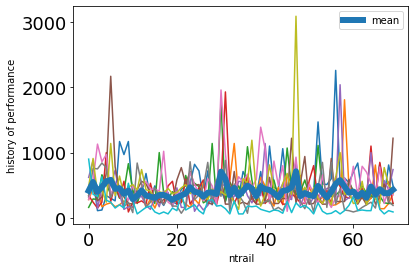

In [90]:
summ = list()
for i in range(10):
#     filebase1 = 'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_6_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_04000_rot_%0d_results.pkl'%(i)
    filebase1 =    'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_8_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_04000_rot_%02d_results.pkl'%(i)
#     print(filebase1)
    # filebase = "bmi_torque_0_hidden_30_drop_0.50_ntrain_%02d_rot_*_results.pkl"
    results = read_all_rotations("results_hw6", filebase1)
    summ.append(results[0]['history'])
#     summ = np.concatenate([summ], [[results[0]['history']]],axis=0)
    plt.plot(results[0]['history'])
# Documents/course_qing/5043_DML/hw6/results_hw6/rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_8_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_04000_rot_00_results.pkl

summ = np.array(summ)
plt.plot(summ.mean(axis =0),label ='mean',linewidth=6)
plt.legend()
plt.xlabel('ntrail')

plt.ylabel('history of performance')

In [69]:
# rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_8_3_Pool_5_5_5_L2_0.000010_lrate_0.000500_epsilon_0.100_batch_04000_rot_00_results


(10, 70)

Text(0, 0.5, 'history')

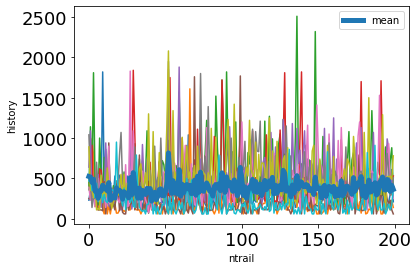

In [97]:
summ_1 = list()
for i in range(10):
#     filebase1 = 'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_6_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_04000_rot_%0d_results.pkl'%(i)
    filebase1 =    'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_8_3_Pool_5_5_5_L2_0.000010_lrate_0.000500_epsilon_0.100_batch_04000_rot_%02d_results.pkl'%(i)
#     print(filebase1)
    # filebase = "bmi_torque_0_hidden_30_drop_0.50_ntrain_%02d_rot_*_results.pkl"
    results = read_all_rotations("results_hw6", filebase1)
    summ_1.append(results[0]['history'])
#     summ = np.concatenate([summ], [[results[0]['history']]],axis=0)
#     plt.figure()
    plt.plot(results[0]['history'])
# Documents/course_qing/5043_DML/hw6/results_hw6/rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_8_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_04000_rot_00_results.pkl

summ_1 = np.array(summ_1)
plt.plot(summ_1.mean(axis =0),label ='mean',linewidth=5)
plt.legend()
plt.xlabel('ntrail')

plt.ylabel('history')

In [93]:
# summ = np.array(summ)
summ

array([[[  10.,  260.],
        [  20.,   70.],
        [  30.,   90.],
        [  40.,   90.],
        [  50.,   90.],
        [  60.,   90.],
        [  70.,   90.],
        [  80.,   90.],
        [  90.,   90.],
        [ 100.,   90.],
        [ 110.,   90.],
        [ 120.,   90.],
        [ 130.,   90.],
        [ 140.,   90.],
        [ 150.,   90.],
        [ 160.,   90.],
        [ 170.,   90.],
        [ 180.,   90.],
        [ 190.,   90.],
        [ 200.,   90.]],

       [[  10.,   60.],
        [  20.,   60.],
        [  30.,   60.],
        [  40.,   60.],
        [  50.,   60.],
        [  60.,   60.],
        [  70.,   60.],
        [  80.,   60.],
        [  90.,   60.],
        [ 100.,   60.],
        [ 110.,   60.],
        [ 120.,   60.],
        [ 130.,   60.],
        [ 140.,   60.],
        [ 150.,   60.],
        [ 160.,   60.],
        [ 170.,   60.],
        [ 180.,   60.],
        [ 190.,   60.],
        [ 200.,   60.]],

       [[  10.,  140.],
        [  2

In [75]:
summ.mean(axis =0)

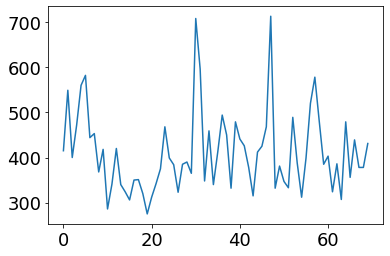

In [76]:
plt.plot(summ.mean(axis =0))

In [9]:
# filebase1 = 'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_3_Cfilters_10_6_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_04000_rot_02_results.pkl'
filebase1 = 'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_8_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_04000_rot_00_results.pkl'
results = read_all_rotations("results_hw6/", filebase1)
results

[{'history': [320.0,
   590.0,
   110.0,
   120.0,
   340.0,
   300.0,
   260.0,
   1170.0,
   970.0,
   1170.0,
   300.0,
   260.0,
   380.0,
   680.0,
   300.0,
   490.0,
   290.0,
   190.0,
   330.0,
   250.0,
   210.0,
   440.0,
   490.0,
   530.0,
   820.0,
   720.0,
   300.0,
   720.0,
   200.0,
   550.0,
   420.0,
   260.0,
   460.0,
   360.0,
   300.0,
   710.0,
   570.0,
   320.0,
   330.0,
   710.0,
   290.0,
   1100.0,
   470.0,
   430.0,
   1060.0,
   440.0,
   460.0,
   400.0,
   360.0,
   450.0,
   380.0,
   390.0,
   1470.0,
   520.0,
   510.0,
   600.0,
   2260.0,
   510.0,
   610.0,
   540.0,
   700.0,
   840.0,
   320.0,
   390.0,
   300.0,
   360.0,
   830.0,
   340.0,
   810.0,
   490.0],
  'greedy_history': [(10, 140.0),
   (20, 120.0),
   (30, 450.0),
   (40, 370.0),
   (50, 370.0),
   (60, 440.0),
   (70, 430.0)],
  'args': Namespace(L2_regularizer=0.0001, action_repeat=6, blend_images=True, conv_nfilters=[10, 8, 3], conv_size=[5, 5, 4], env='MsPacman-v0', epsilo

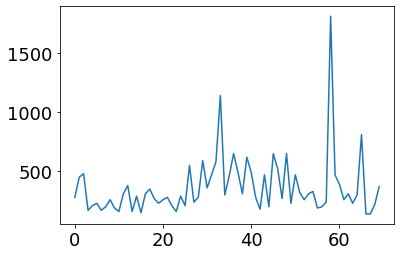

In [125]:
plt.plot(results[0]['history'])

In [51]:
pwd

'/Users/qingn/Documents/course_qing/5043_DML/hw6'

In [70]:
results

[]

In [96]:

file_base = 'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_3_Cfilters_10_6_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_02000_rot_02_results.pkl'
# Documents/course_qing/5043_DML/hw6/results_hw6/
files = fnmatch.filter(os.listdir("results_hw6"), file_base)

In [97]:
files

['rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_3_Cfilters_10_6_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_02000_rot_02_results.pkl']

In [61]:
os.listdir()

['cnn_classifier.py',
 'rl_support.py',
 '.DS_Store',
 'results_hw6',
 '__pycache__',
 'hw6_basis.py',
 '.ipynb_checkpoints',
 'job_control.py',
 'hw6_minimalist.ipynb']

In [66]:
files


[]

In [64]:
os.listdir("results_hw6")

['rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_8_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_04000_rot_01_results.pkl',
 'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_8_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_04000_rot_08_results.pkl',
 '.DS_Store',
 'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_8_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_04000_rot_04_results.pkl',
 'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_3_Cfilters_10_6_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_02000_rot_02_results.pkl',
 'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_8_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_04000_rot_07_results.pkl',
 'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_8_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.100_batch_04000_rot_02_results.pkl',
 'rl_MsPacman-v0_PG_hidden_40_20_Csize_5_5_4_Cfilters_10_8_3_Pool_5_5_5_L2_0.000100_lrate_0.000500_epsilon_0.1